
# 01_the-transformeddistribution-class

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
import numpy as np

In [2]:
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2022-04-29 14:20:14.384426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 14:20:14.444827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 14:20:14.445121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [6]:
normal = tfd.Normal(loc=0., scale=1.)
z = normal.sample(3)
z

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.6196456 , -0.91738534,  0.2566216 ], dtype=float32)>

In [7]:
exp = tfb.Exp()
x = exp.forward(z)
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.19796884, 0.3995624 , 1.2925559 ], dtype=float32)>

In [8]:
log_normal = tfd.TransformedDistribution(normal, exp)
log_normal

<tfp.distributions.TransformedDistribution 'expNormal' batch_shape=[] event_shape=[] dtype=float32>

In [9]:
from IPython.display import display
display(log_normal.sample())
log_normal.log_prob(x) # To maximize

<tf.Tensor: shape=(), dtype=float32, numpy=0.28824148>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.610919  , -0.42235112, -1.2084875 ], dtype=float32)>

# 02_coding-tutorial-the-transformed-distribution-class

The TransformedDistribution class

In [3]:
n = 10000
loc = 0
scale = 0.5

In [4]:
normal = tfd.Normal(loc=loc, scale=scale)

2022-04-29 14:22:07.209723: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-29 14:22:07.210146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 14:22:07.210589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 14:22:07.210962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


Log-normal distribution (对数正态分布)
https://en.wikipedia.org/wiki/Log-normal_distribution

自然常数的指数函数($e^x$)的bijector

In [9]:
exp = tfb.Exp()

In [10]:
log_normal_td = exp(normal)

In [11]:
print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [12]:
z = normal.sample(n)
display(z)

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([ 0.5498862 ,  1.2280365 ,  0.41811198, ...,  0.05043548,
        0.31476492, -1.2193221 ], dtype=float32)>

Plots

In [13]:
type(z)

tensorflow.python.framework.ops.EagerTensor

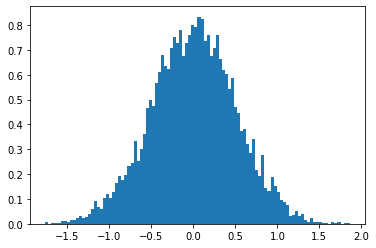

In [14]:
plt.hist(z.numpy(), bins=100, density=True)
plt.show()

In [15]:
x = log_normal_td.sample(n)

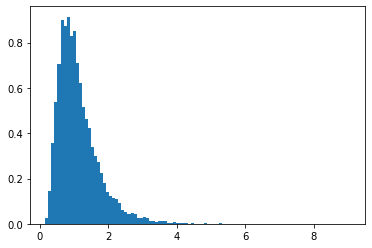

In [16]:
plt.hist(x.numpy(), bins=100, density=True)
plt.show()

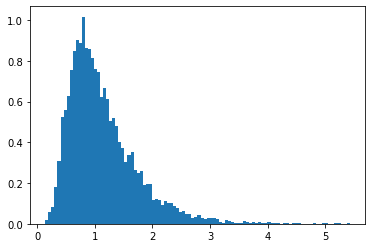

In [17]:
log_normal = tfd.LogNormal(loc=loc, scale=scale)
l = log_normal.sample(n)

plt.hist(l.numpy(), bins=100, density=True)
plt.show()

Log probability

In [18]:
log_prob = log_normal.log_prob(x)
log_prob_td = log_normal_td.log_prob(x)

tf.norm(log_prob - log_prob_td)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [19]:
# np.set_printoptions(precision=10)

a = tf.norm(log_prob - log_prob_td)
a.numpy()

0.0

Event shape and Batch shape

In [20]:
tril = tf.random.normal((2, 4, 4)) #相当于２个４Ｘ４矩阵
tril

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-0.56953585,  2.3834207 , -0.2164312 , -0.18166305],
        [ 1.1368589 ,  0.32028311, -0.3716124 ,  1.5029223 ],
        [-0.8328388 , -1.9963025 , -0.6005632 ,  2.06205   ],
        [ 0.596155  , -0.214932  ,  1.0988408 , -0.41731614]],

       [[ 2.0778096 , -0.10518248, -1.2540401 ,  0.7999816 ],
        [-1.1863967 ,  2.4897904 ,  1.7577654 , -0.5321284 ],
        [ 0.38001925,  1.4962028 ,  1.7609248 , -0.73470634],
        [ 2.9253726 ,  0.7047957 ,  0.050508  ,  0.58643174]]],
      dtype=float32)>

In [21]:
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)
scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-0.56953585,  0.        ,  0.        ,  0.        ],
        [ 1.1368589 ,  0.32028311,  0.        ,  0.        ],
        [-0.8328388 , -1.9963025 , -0.6005632 ,  0.        ],
        [ 0.596155  , -0.214932  ,  1.0988408 , -0.41731614]],

       [[ 2.0778096 ,  0.        ,  0.        ,  0.        ],
        [-1.1863967 ,  2.4897904 ,  0.        ,  0.        ],
        [ 0.38001925,  1.4962028 ,  1.7609248 ,  0.        ],
        [ 2.9253726 ,  0.7047957 ,  0.050508  ,  0.58643174]]],
      dtype=float32)>

In [22]:
scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)

In [35]:
x = [1., 2, 3, 4]
scale_lin_op.forward(x) # https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/ScaleMatvecLinearOperator

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.56953585,  1.7774252 , -6.6271334 ,  1.7935491 ],
       [ 2.0778096 ,  3.7931843 ,  8.655199  ,  6.832215  ]],
      dtype=float32)>

In [54]:
# `normal` is a univariate normal distribution, `scale_lin_op` is a bijector with two 4x4 lower triangular matrix to multiply with, which assumes event_shape=[4] meaning a 4-variables multivariate distribution. Therefore, is the following TransformedDistribution valid? It doesn't look valid to me. Now it makes sense that when calling `sample` function of it, it returns "ValueError: Dimensions 4 and 2 are not compatible"
mvn = tfd.TransformedDistribution(normal, scale_lin_op, ) # batch_shape=[2],  event_shape=[4]
mvn

<tfp.distributions.TransformedDistribution 'scale_matvec_linear_operatorNormal' batch_shape=[2] event_shape=[] dtype=float32>

In [55]:
mvn.batch_shape, mvn.event_shape

(TensorShape([2]), TensorShape([]))

In [56]:
y1 = mvn.sample(sample_shape=(n,))
y1

ValueError: Dimensions 4 and 2 are not compatible

In [62]:
# Test tfd.Sample - we can sample 4-variate normal random vector from the univariate normal distribution `normal`.
s = tfd.Sample(
    normal, # base_dist.batch_shape == [2]
    sample_shape=[4] # base_dist.event_shape == [4]
)
display(s)
display(s.sample())
s.sample().shape

<tfp.distributions.Sample 'SampleNormal' batch_shape=[] event_shape=[4] dtype=float32>

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.48736566, -0.7308461 ,  0.7168085 ,  0.00638874], dtype=float32)>

TensorShape([4])

In [64]:
# Therefore, now we can use tfd.Sample() to sample a 4-variate normal random vector, this feels like a multivariate normal distribution, but it is not.
# This will be a valid TransformedDistribution now.
mvn2 = tfd.TransformedDistribution(
    distribution=tfd.Sample(
        normal, # base_dist.batch_shape == [2]
        sample_shape=[4] # base_dist.event_shape == [4]
    ),
    bijector=scale_lin_op, ) # batch_shape=[2],  event_shape=[4]
mvn2

<tfp.distributions.TransformedDistribution 'scale_matvec_linear_operatorSampleNormal' batch_shape=[2] event_shape=[4] dtype=float32>

In [65]:
# mvn2 = tfd.TransformedDistribution(
#     distribution=tfd.Sample(
#         tfd.Normal(loc=[loc, loc], scale=scale), # base_dist.batch_shape == [2]
#         sample_shape=[4] # base_dist.event_shape == [4]
#     ),
#     bijector=scale_lin_op, ) # batch_shape=[2],  event_shape=[4]
# mvn2

In [66]:
y2 = mvn2.sample(sample_shape=(n,))
y2.shape

TensorShape([10000, 2, 4])

In [70]:
mvn3 = tfd.MultivariateNormalLinearOperator(loc=loc, scale=scale_low_tri)
mvn3

<tfp.distributions.MultivariateNormalLinearOperator 'MultivariateNormalLinearOperator' batch_shape=[2] event_shape=[4] dtype=float32>

In [71]:
y3 = mvn3.sample(sample_shape=(n,))
y3.shape

TensorShape([10000, 2, 4])

In [79]:
# Check
xn = normal.sample((n, 2, 4)) # sample_shape = (n, 2, 4)
tf.norm(mvn2.log_prob(xn) - mvn3.log_prob(xn)) / tf.norm(mvn2.log_prob(xn))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7498207>

In [75]:
xn[0]

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 0.3969926 , -0.45212665, -0.5570738 , -0.7961982 ],
       [ 0.76418835, -0.4112784 ,  0.21808837,  0.40693185]],
      dtype=float32)>

-------

In [4]:
x = [1., 2, 3]

diag = [1., 2, 3]
scale = tf.linalg.LinearOperatorDiag(diag)
scale.to_dense()

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]], dtype=float32)>

In [5]:
bijector = tfb.ScaleMatvecLinearOperator(scale)
bijector

<tfp.bijectors.ScaleMatvecLinearOperator 'scale_matvec_linear_operator' batch_shape=[] forward_min_event_ndims=1 inverse_min_event_ndims=1 dtype_x=float32 dtype_y=float32>

In [6]:
# In this case, `forward` is equivalent to:
# y = scale @ x
y = bijector.forward(x)  # Tensor([1., 4, 9])
y

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 9.], dtype=float32)>

Ｔｅｎｓｏｒｆｌｏｗ中的向量

In [7]:
# 2-D tensor `a`
# [[1, 2, 3],
#  [4, 5, 6]]
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [20]:
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [8]:
# 1-D tensor `b`
# [7, 9, 11]
b = tf.constant([7, 9, 11], shape=[3])
b

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 7,  9, 11], dtype=int32)>

In [17]:
b.numpy()

array([ 7,  9, 11], dtype=int32)

In [9]:
# `a` * `b`
# [ 58,  64]
c = tf.linalg.matvec(a, b)
c

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 58, 139], dtype=int32)>

In [10]:
tf.linalg.matvec(b, a)

InvalidArgumentError: In[0] ndims must be >= 2: 1 [Op:BatchMatMulV2]

In [13]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [14]:
v = np.array([1, 2])
v

array([1, 2])

In [15]:
z = np.array([[1], [2]])
z

array([[1],
       [2]])

In [16]:
A = np.arange(4).reshape((2, 2))
A

array([[0, 1],
       [2, 3]])

In [18]:
np.matmul(v, A)

array([4, 7])

In [19]:
np.matmul(A, v)

array([2, 8])